LAB-7: Random Walk

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stats

In [ ]:
# defining a random variable
# p = probability of heads , q= 1-p
# n = Number of Steps
def X(n, p, q):
  return np.random.choice([-1, 1], size=n, p=[q, p])

In [ ]:
# Number of Random Walks
# m = Number of Trajectories
def random_walk(num_simulations, n, p, q):
    traj = []
    for i in range(1, num_simulations+1):
        traj.append(np.cumsum(X(n,p,q)))
    return traj

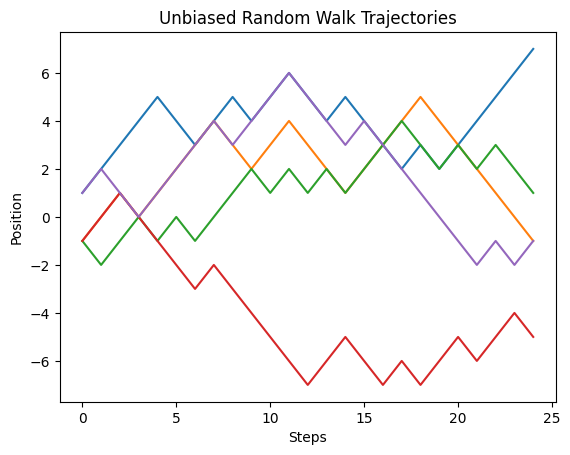

In [ ]:
m = 5 #Number of Trajectories
n = 25 #Number of Steps of the Random Walk
p = 0.5 #For an Unbiased Random Walk
q = 1 - p


trajectories = random_walk(m, n, p, q)
# print(len(trajectories))

for traj in trajectories:
    plt.plot(range(n), traj)

plt.xlabel('Steps')
plt.ylabel('Position')
plt.title('Unbiased Random Walk Trajectories')
plt.show()

Increasing the number of simulations

<Axes: >

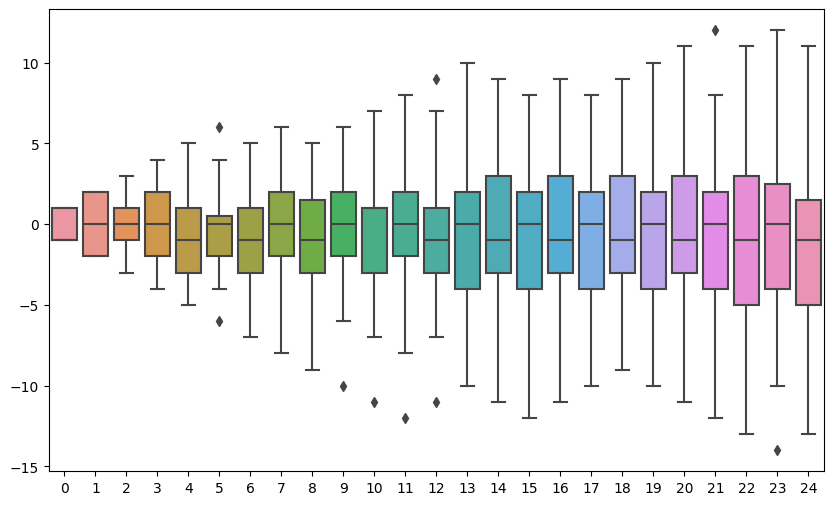

In [ ]:
m = 100 #Number of Trajectories
n = 25 #Number of Steps of the Random Walk
p = 0.5 #For an Unbiased Random Walk
q = 1 - p

trajectories = random_walk(m, n, p, q)
trajectories = np.array(trajectories)
plt.figure(figsize=(10, 6))
sns.boxplot(trajectories)

In [ ]:
def mean_var(n, p, q):
    simulations = [100, 1000, 5000, 10000]
    # fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a 2x1 subplot grid
    fig_mean, ax_mean = plt.subplots(figsize=(8, 6))
    fig_var, ax_var = plt.subplots(figsize=(8, 6))

    for itr in simulations:
        trajectories = random_walk(itr, n, p, q)
        trajectories = np.array(trajectories)
        mean = np.mean(trajectories, axis=0)
        var = np.var(trajectories, axis=0)
        # plt.plot(range(n), mean, label=itr)

        # Plot Mean
        ax_mean.plot(range(n), mean, label=f'Simulations={itr}')
        ax_mean.set_xlabel('Steps')
        ax_mean.set_ylabel('Average Position')
        ax_mean.set_title('Mean of Unbiased Random Walk')
        ax_mean.legend()

        # Plot Variance
        ax_var.plot(range(n), var, label=f'Simulations={itr}')
        ax_var.set_xlabel('Steps')
        ax_var.set_ylabel('Variance')
        ax_var.set_title('Variance of Unbiased Random Walk')
        ax_var.legend()

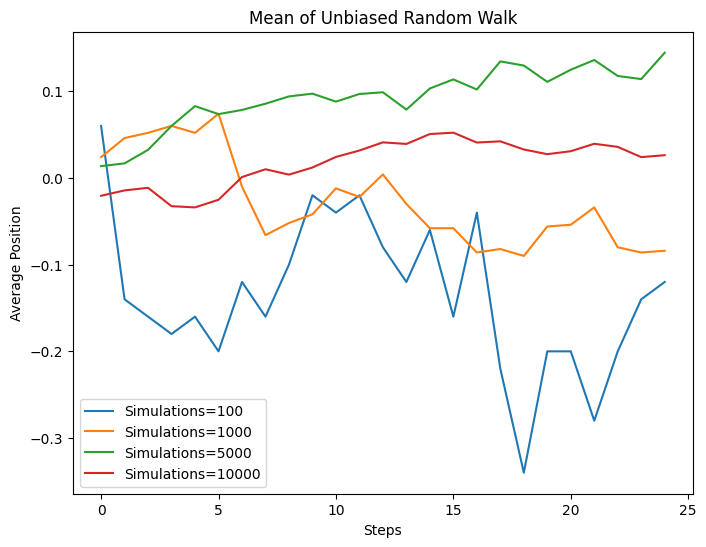

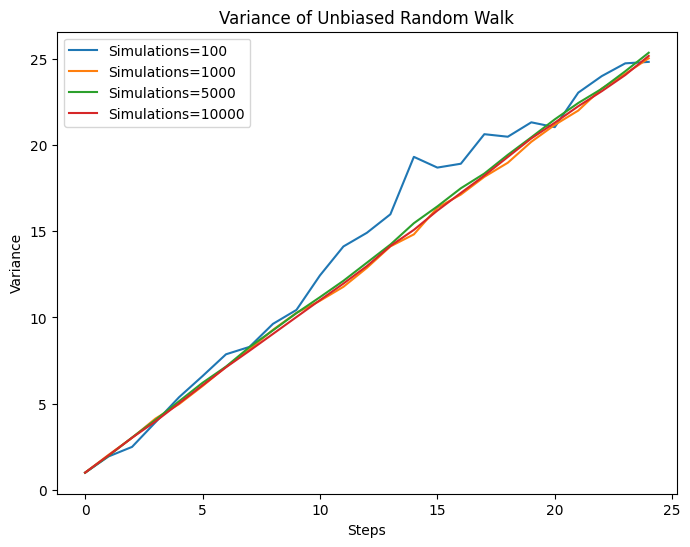

In [ ]:
mean_var(n,p,q)

Plotting the Distribution

In [ ]:
from collections import Counter  # It helps to create a dictionary, which keeps a count of how many times a number has occured.
from scipy.stats import norm, cauchy

# We have to compute the probability at location m, after n steps
def distribution(num_simulations, n, p, q):
    positions = []
    for i in range(1, num_simulations+1):
        positions.append(np.sum(X(n,p,q)))


    counts = dict(Counter(positions))
    m_values = list(counts.keys())
    probabilities = [count / num_simulations for count in counts.values()]
    mean = np.mean(positions)
    std = np.std(positions)

    x = np.linspace(mean-3*std, mean+3*std,1000)
    normal_dist = stats.norm(loc=mean, scale=std)
    pdf = normal_dist.pdf(x)

    # Plot the probability distribution
    plt.bar(m_values, probabilities, width=1.0)
    plt.xlabel('Position (m)')
    plt.ylabel('Probability Pn(m)')
    plt.title(f'Probability Distribution after {n} Steps')
    plt.show()

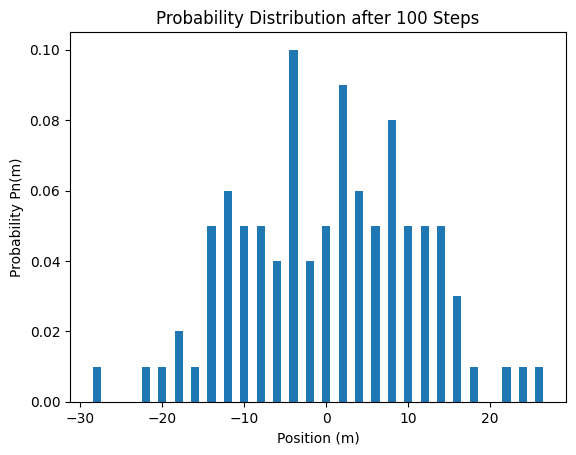

In [ ]:
distribution(100, 100, 0.5, 0.5)

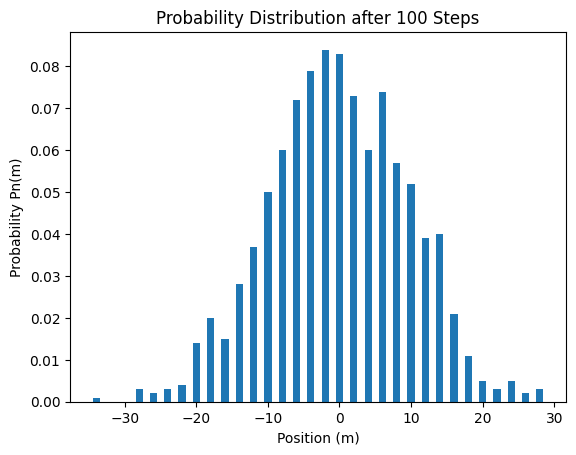

In [ ]:
distribution(1000, 100, 0.5, 0.5)

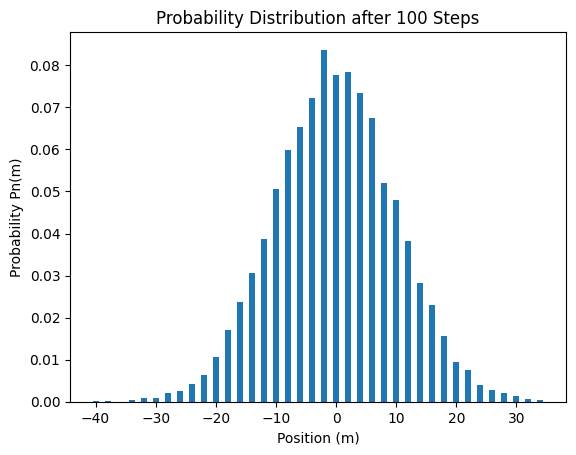

In [ ]:
distribution(10000, 100, 0.5, 0.5)

### Biased Random Walk (p $\neq$ q)


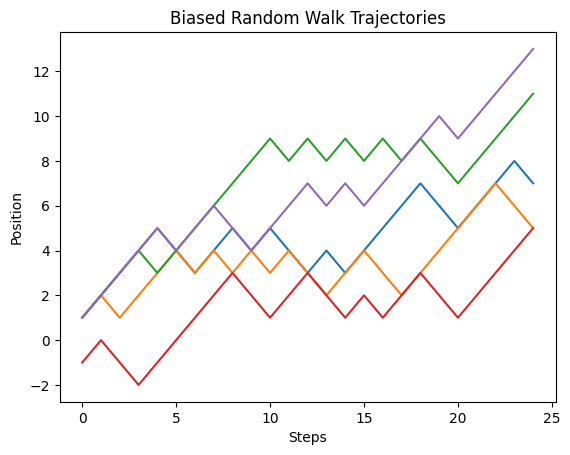

In [ ]:
m = 5 #Number of Trajectories
n = 25 #Number of Steps of the Random Walk
p = 0.7 # For an Biased Random Walk, p is the probability of +1
q = 1 - p


trajectories = random_walk(m, n, p, q)


for traj in trajectories:
    plt.plot(range(n), traj)

plt.xlabel('Steps')
plt.ylabel('Position')
plt.title('Biased Random Walk Trajectories')
plt.show()

<Axes: >

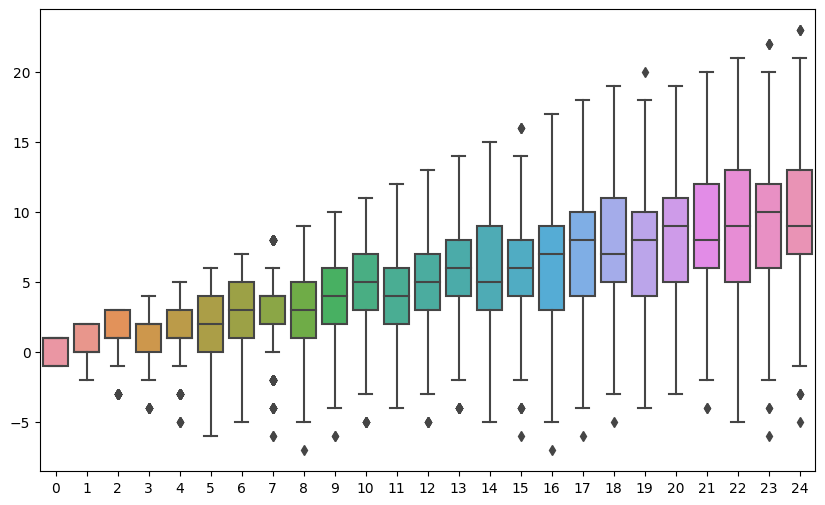

In [ ]:
m = 1000 #Now making a box plot for 1000 simulations
trajectories = random_walk(m, n, p, q)
trajectories = np.array(trajectories)
plt.figure(figsize=(10, 6))
sns.boxplot(trajectories)

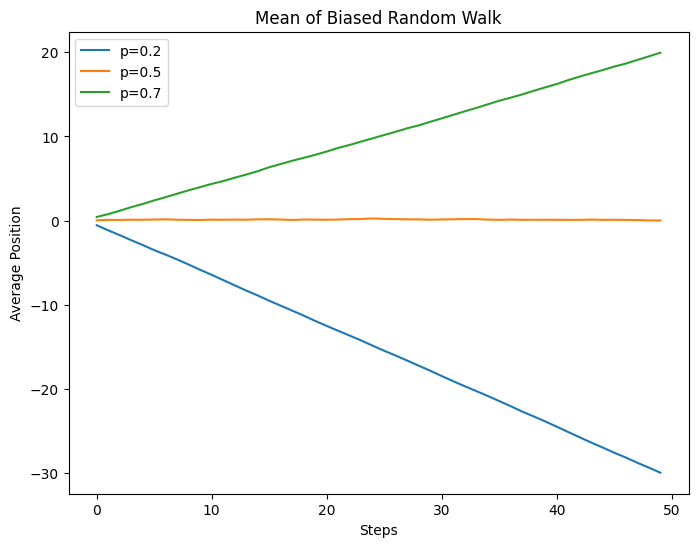

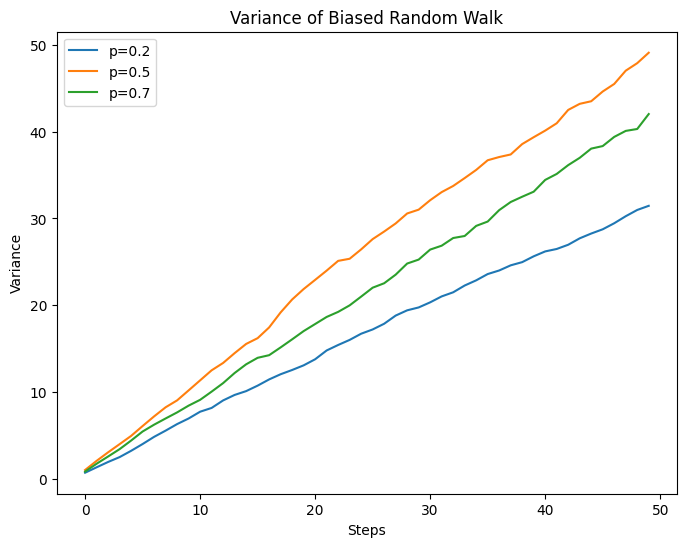

In [ ]:
p_vals = [0.2, 0.5, 0.7]
# fig, axes = plt.subplots(1,2,figsize=(12,6))
fig_mean, ax_mean = plt.subplots(figsize=(8, 6))
fig_var, ax_var = plt.subplots(figsize=(8, 6))

for val in p_vals:
    trajectories = random_walk(1000, 50, val, 1-val)
    trajectories = np.array(trajectories)

    mean = np.mean(trajectories, axis=0)
    var = np.var(trajectories, axis=0)
    # plt.plot(range(n), mean, label=itr)

    # Plot Mean
    ax_mean.plot(range(50), mean, label=f'p={val}')
    ax_mean.set_xlabel('Steps')
    ax_mean.set_ylabel('Average Position')
    ax_mean.set_title('Mean of Biased Random Walk')
    ax_mean.legend()

    # Plot Variance
    ax_var.plot(range(50), var, label=f'p={val}')
    ax_var.set_xlabel('Steps')
    ax_var.set_ylabel('Variance')
    ax_var.set_title('Variance of Biased Random Walk')
    ax_var.legend()

plt.show()

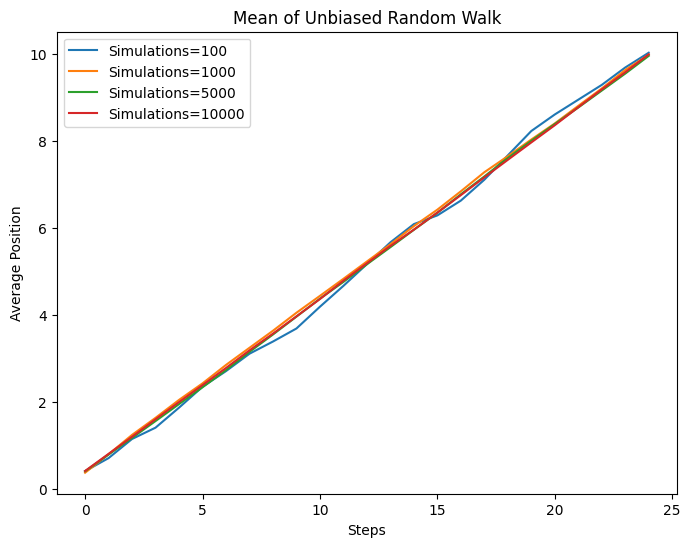

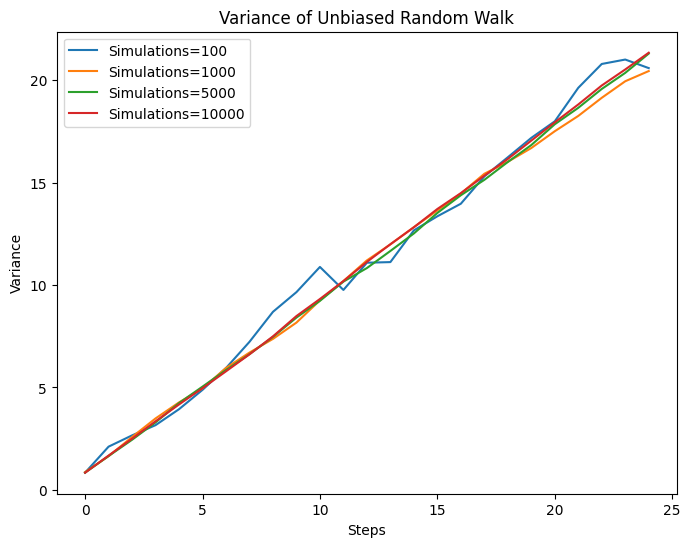

In [ ]:
mean_var(n,0.7,0.3)

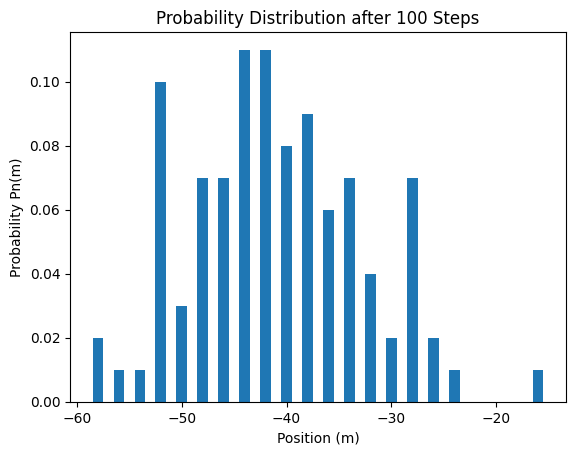

In [ ]:
distribution(100, 100, 0.3, 0.7)

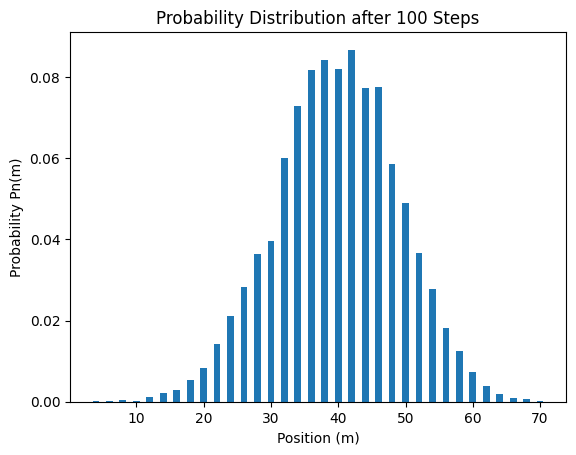

In [ ]:
distribution(10000, 100, 0.7, 0.3)

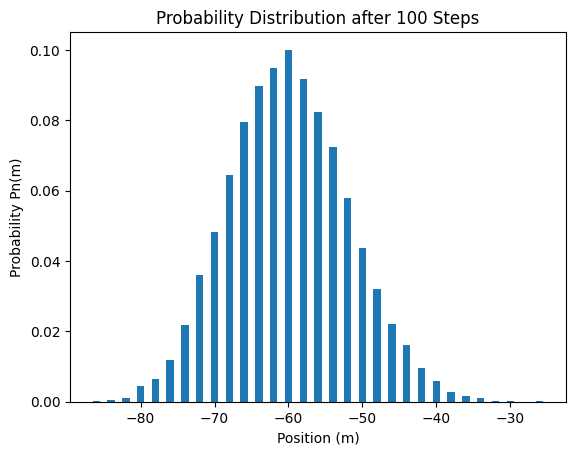

In [ ]:
distribution(10000, 100, 0.2, 0.8)

#### 2D random-walk

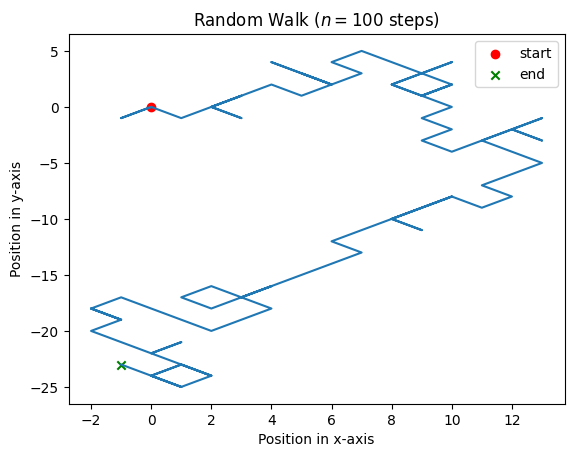

In [ ]:
# Python code for 2D random walk.
import numpy
import pylab
import random

# defining the number of steps
n = 100


#creating two array for containing x and y coordinate
#of size equals to the number of size and filled up with 0's
x = numpy.zeros(n)
y = numpy.zeros(n)
x[0] = 0
y[0] = 0

# filling the coordinates with random variables
for i in range(1, n):
	val = random.randint(1, 4)
	if val == 1:
		x[i] = x[i - 1] + 1
		y[i] = y[i - 1] + 1
	elif val == 2:
		x[i] = x[i - 1] - 1
		y[i] = y[i - 1] + 1
	elif val == 3:
		x[i] = x[i - 1] - 1
		y[i] = y[i - 1] - 1
	else:
		x[i] = x[i - 1] + 1
		y[i] = y[i - 1] - 1

# plotting stuff:
pylab.title("Random Walk ($n = " + str(n) + "$ steps)")
pylab.plot(x, y)
plt.scatter(x[0], y[0], marker='o', label='start', color='r')
plt.scatter(x[len(x) - 1], y[len(x) - 1], marker='x', label='end', color='g')
plt.xlabel('Position in x-axis')
plt.ylabel('Position in y-axis')
plt.legend()
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()

###### average distance vs number of steps plot

In [ ]:
def randomWalkDistance(n, x_0, y_0):
  x = x_0
  y = y_0

  for i in range(1, n):
    val = random.randint(1, 4)
    if val == 1:
      x = x + 1
    elif val == 2:
      x = x - 1
    elif val == 3:
      y = y + 1
    else:
      y = y - 1

  return np.sqrt((x - x_0)**2 + (y - y_0)**2)

In [ ]:
def meanRandomWalkDist(n, m):
  sumDist = 0
  for i in range(0, m):
    sumDist = sumDist + randomWalkDistance(n, 0, 0)

  return sumDist / m

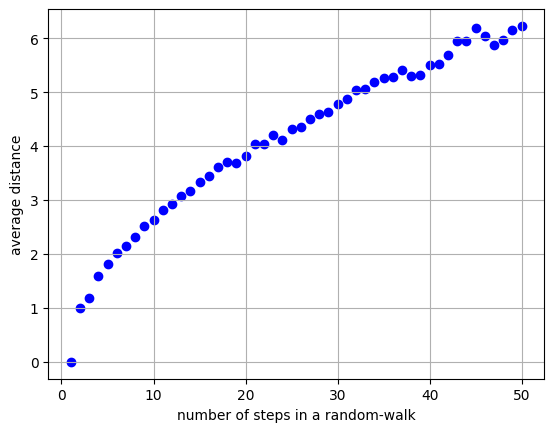

In [ ]:
n = np.arange(1, 51, 1)
avg_dist = []

for i in n:
  avg_dist = np.append(avg_dist, meanRandomWalkDist(i, 1000))

plt.scatter(n, avg_dist, color='b')
plt.xlabel('number of steps in a random-walk')
plt.ylabel('average distance')
plt.grid()

A hiker without a compass trying to find the way in the dark can step in any
of eight directions (N, NE, E, SE, S, SW, W, NW) with each step. Studies show that people tend to veer to the right under such circumstances. Initially,
the hiker is facing north. Suppose at each step probabilities of going in the
indicated directions are as follows: N, 19%; NE, 24%; E, 17%; SE, 10%; S,
2%; SW, 3%; W, 10%; NW, 15%. Develop a simulation to trace a path of a
hiker, and run the simulation a number of times. Describe the results. (Note
that other than at the initial step, this simulation simplifies the problem by
ignoring the direction in which the hiker faces.)

In [ ]:
def hiker_walk(n):

  x = np.zeros(n)
  y = np.zeros(n)
  x[0] = 0
  y[0] = 0

  for i in range(1, n):
    val = np.random.choice([1, 2, 3, 4, 5, 6, 7, 8], p=[0.19, 0.24, 0.17, 0.1, 0.02, 0.03, 0.1, 0.15])
    # print(dir)

    # N
    if val == 1:
      x[i] = x[i - 1]
      y[i] = y[i - 1] + 1
    # NE
    elif val == 2:
      x[i] = x[i - 1] + 1
      y[i] = y[i - 1] + 1
    # E
    elif val == 3:
      x[i] = x[i - 1] + 1
      y[i] = y[i - 1]
    # SE
    elif val == 4:
      x[i] = x[i - 1] + 1
      y[i] = y[i - 1] - 1
    # S
    elif val == 5:
      x[i] = x[i - 1]
      y[i] = y[i - 1] - 1
    elif val == 6:
      x[i] = x[i - 1] - 1
      y[i] = y[i - 1] - 1
    elif val == 7:
      x[i] = x[i - 1] - 1
      y[i] = y[i - 1]
    elif val == 8:
      x[i] = x[i - 1] - 1
      y[i] = y[i - 1] + 1


  # plotting stuff:
  # plt.figure(figsize=(10,10))
  pylab.title("Random Walk ($n = " + str(n) + "$ steps)")
  pylab.plot(x, y)
  plt.scatter(x[0], y[0], marker='o', label='start', color='r')
  plt.scatter(x[len(x) - 1], y[len(x) - 1], marker='x', label='end', color='g')
  plt.xlabel('Position in x-axis')
  plt.ylabel('Position in y-axis')
  plt.legend()
  pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
  pylab.show()

  return x[len(x) - 1], y[len(x) - 1]

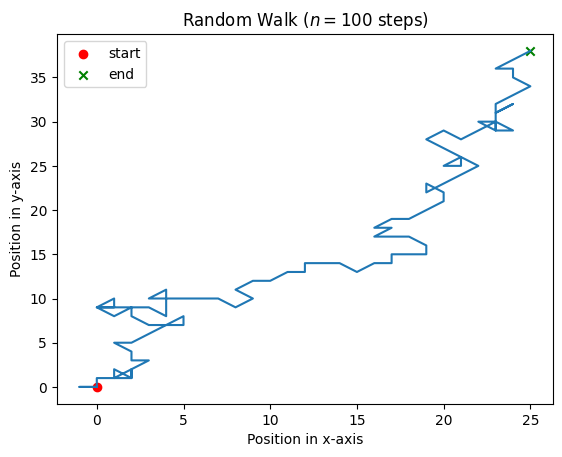

(25.0, 38.0)

In [ ]:
hiker_walk(100)

The below plot shows the ending point of a hiker when simulated the walk for 100 time.

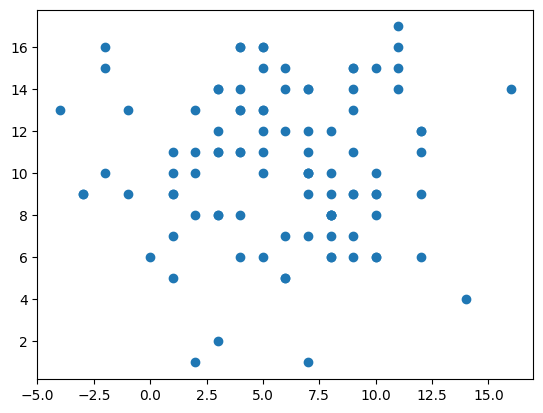

In [ ]:
x = []
y = []
for i in range(1, 100):
  x_i, y_i = hiker_walk(25)
  # print(x_i, y_i)
  x = np.append(x, x_i)
  y = np.append(y, y_i)

plt.scatter(x, y)